# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint
# Import API key
from api_keys import weather_api_key
from datetime import date

today = date.today()

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
url="http://api.openweathermap.org/data/2.5/weather?"
#units: imperial or metric
units="imperial"
query_url=f"{url}appid={weather_api_key}&units={units}&q="

#empty arrays will store weather data for cities
temp=[]
latitude=[]
longitude=[]
clouds=[]
humid=[]
wind=[]

#error handling for cities that do not have weather data
for city in cities:
    try:
        response=requests.get(query_url+city).json()
        #check the json format for calls
        #pprint(response)
        temp.append(response['main']['temp'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        clouds.append(response['clouds']['all'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        print(f"The temp in {cities.index(city)}:{city} is {response['main']['temp']}. Lat: {response['coord']['lat']}. Long: {response['coord']['lon']}")
    except: 
        temp.append('NaN')
        latitude.append('NaN')
        longitude.append('NaN')
        clouds.append('NaN')
        humid.append('NaN')
        wind.append('NaN')
        print (f"{cities.index(city)}:{city} not found.")
        
#check list lengths to make sure they all match prior to joining in dataframe (part of early troubleshooting)
print(f"Cities: {len(cities)}")
print(f"Lats: {len(latitude)}")
print(f"Longs: {len(longitude)}")
print(f"Temp: {len(temp)}")
print(f"clouds: {len(clouds)}")
print(f"humid: {len(humid)}")
print(f"wind: {len(wind)}")        

The temp in 0:jamestown is 77.32. Lat: 42.1. Long: -79.24
The temp in 1:paamiut is 46.15. Lat: 61.99. Long: -49.67
The temp in 2:la reforma is 91. Lat: 25.08. Long: -108.05
The temp in 3:bengkulu is 75.7. Lat: -3.8. Long: 102.27
The temp in 4:palmer is 88.63. Lat: 42.16. Long: -72.33
The temp in 5:college is 68.58. Lat: 64.86. Long: -147.8
The temp in 6:albany is 86.68. Lat: 42.6. Long: -73.97
The temp in 7:longyearbyen is 44.6. Lat: 78.22. Long: 15.64
The temp in 8:lethem is 78.15. Lat: 3.38. Long: -59.8
The temp in 9:beisfjord is 51.8. Lat: 68.38. Long: 17.6
The temp in 10:sarangani is 84.33. Lat: 5.4. Long: 125.46
The temp in 11:dikson is 39.83. Lat: 73.51. Long: 80.55
The temp in 12:marienburg is 60.42. Lat: 54.04. Long: 19.03
13:barentsburg not found.
The temp in 14:xining is 55.38. Lat: 36.62. Long: 101.77
The temp in 15:ushuaia is 28.4. Lat: -54.8. Long: -68.3
16:jahrom not found.
The temp in 17:ketchikan is 59. Lat: 55.34. Long: -131.65
The temp in 18:dickinson is 83.73. Lat: 2

The temp in 148:sitka is 57.2. Lat: 57.05. Long: -135.33
The temp in 149:butaritari is 82.94. Lat: 3.07. Long: 172.79
The temp in 150:tura is 74.28. Lat: 25.52. Long: 90.22
151:sentyabrskiy not found.
The temp in 152:cidreira is 67.32. Lat: -30.18. Long: -50.21
The temp in 153:jalu is 77.25. Lat: 29.03. Long: 21.55
The temp in 154:bredasdorp is 60.8. Lat: -34.53. Long: 20.04
The temp in 155:ostrovnoy is 61.79. Lat: 68.05. Long: 39.51
The temp in 156:thinadhoo is 83.93. Lat: 0.53. Long: 72.93
The temp in 157:moose factory is 64.4. Lat: 51.26. Long: -80.61
The temp in 158:adwa is 61.18. Lat: 14.16. Long: 38.9
The temp in 159:necochea is 52. Lat: -38.55. Long: -58.74
The temp in 160:peleduy is 52.23. Lat: 59.63. Long: 112.74
The temp in 161:pedasi is 80.06. Lat: 7.53. Long: -80.03
The temp in 162:port blair is 80.73. Lat: 11.67. Long: 92.75
The temp in 163:hovd is 68.31. Lat: 48.01. Long: 91.64
The temp in 164:granadilla de abona is 73.74. Lat: 28.12. Long: -16.58
The temp in 165:thompson

The temp in 299:nikolskoye is 62.53. Lat: 59.7. Long: 30.79
The temp in 300:adelanto is 100.94. Lat: 34.58. Long: -117.41
The temp in 301:basoko is 71.08. Lat: 1.24. Long: 23.62
The temp in 302:auxerre is 63.72. Lat: 47.8. Long: 3.57
303:palabuhanratu not found.
The temp in 304:hoquiam is 71.33. Lat: 46.98. Long: -123.89
The temp in 305:yulara is 48.2. Lat: -25.24. Long: 130.99
The temp in 306:marrakesh is 80.6. Lat: 31.63. Long: -8.01
The temp in 307:alikalia is 69.64. Lat: 9.17. Long: -11.4
The temp in 308:luderitz is 62.6. Lat: -26.65. Long: 15.16
The temp in 309:barwadih is 78.1. Lat: 23.83. Long: 84.12
The temp in 310:vanimo is 82.18. Lat: -2.67. Long: 141.3
The temp in 311:grand gaube is 69.01. Lat: -20.01. Long: 57.66
The temp in 312:brae is 51.8. Lat: 60.4. Long: -1.35
The temp in 313:basay is 81.14. Lat: 9.41. Long: 122.64
The temp in 314:ust-maya is 67.64. Lat: 60.42. Long: 134.53
315:samusu not found.
The temp in 316:sao filipe is 76.69. Lat: 14.9. Long: -24.5
The temp in 31

449:paradwip not found.
The temp in 450:mujiayingzi is 70.18. Lat: 42.12. Long: 118.78
The temp in 451:kholmogory is 51.8. Lat: 64.22. Long: 41.66
The temp in 452:hirara is 83.14. Lat: 24.8. Long: 125.28
The temp in 453:matara is 77.56. Lat: 5.95. Long: 80.54
The temp in 454:rock sound is 83.8. Lat: 24.9. Long: -76.2
The temp in 455:mantua is 73.78. Lat: 45.17. Long: 10.78
The temp in 456:mayumba is 70.83. Lat: -3.43. Long: 10.66
The temp in 457:atambua is 69.53. Lat: -9.11. Long: 124.89
The temp in 458:santo domingo is 86.18. Lat: 18.5. Long: -69.99
The temp in 459:wangaratta is 35.76. Lat: -36.37. Long: 146.33
The temp in 460:sydney is 48.58. Lat: -33.87. Long: 151.21
The temp in 461:kurchum is 70.12. Lat: 48.57. Long: 83.65
The temp in 462:booue is 71.82. Lat: -0.09. Long: 11.94
The temp in 463:marawi is 75.99. Lat: 8. Long: 124.29
The temp in 464:iqaluit is 46.2. Lat: 63.75. Long: -68.51
The temp in 465:verkhnevilyuysk is 62.02. Lat: 63.45. Long: 120.32
The temp in 466:columbus is 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
#combine weather data to dictionary and array
weather_dict={
    "city":cities,
    "lat":latitude,
    "long":longitude,
    "temp":temp,
    "clouds":clouds,
    "humid":humid,
    "wind":wind
}
weather_data=pd.DataFrame(weather_dict)
weather_data.head(10)

,city,lat,long,temp,clouds,humid,wind
0,jamestown,42.1,-79.24,77.32,1,50,13.87
1,paamiut,61.99,-49.67,46.15,99,79,2.1
2,la reforma,25.08,-108.05,91,10,64,8.01
3,bengkulu,-3.8,102.27,75.7,69,88,5.41
4,palmer,42.16,-72.33,88.63,40,41,10.29
5,college,64.86,-147.8,68.58,75,63,7.25
6,albany,42.6,-73.97,86.68,81,43,7.65
7,longyearbyen,78.22,15.64,44.6,75,93,3.36
8,lethem,3.38,-59.8,78.15,96,83,4.18
9,beisfjord,68.38,17.6,51.8,100,93,4.7


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
#check for cities with out of range humidity: gt 100%

weather_data['humidity'] = pd.to_numeric(weather_data['humid'], errors='coerce')
weather_data['humidity'].describe()
#No places with humidity >100
#humid_df=weather_data.loc[weather_data["humidity"]>100]


count    548.000000
mean      71.600365
std       20.244551
min        7.000000
25%       61.000000
50%       77.000000
75%       87.000000
max      100.000000
Name: humidity, dtype: float64

In [34]:
#check cloudiness for out of range: Gt 100%
weather_data['clouds'] = pd.to_numeric(weather_data['clouds'], errors='coerce')
weather_data['clouds'].describe()


count    548.000000
mean      52.406934
std       38.976584
min        0.000000
25%        9.000000
50%       58.500000
75%       90.000000
max      100.000000
Name: clouds, dtype: float64

In [35]:
#  Get the indices of cities that have humidity over 100%.
#No cities with humidity over 100%

In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#N/A No cities with humidity >100

In [37]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
weather_data.to_csv('weather.csv',index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

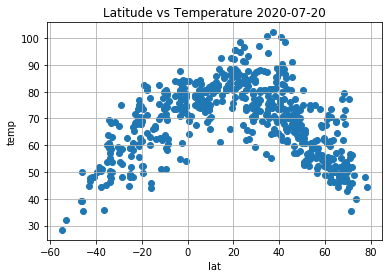

In [38]:
#define a function for creating scatter plots for various weather attributes by temperature
#input (data frame, x value, y value, title of plot)
#create scatter plot and export to .png
def my_plot(mydf, x, y, title):
    plt.scatter(mydf[x],mydf[y], marker="o")
    new_title=title+" "+str(today)
    plt.title(new_title)
    plt.ylabel(y)
    plt.xlabel(x)
    plt.grid(True)
    filename=title+"_"+str(today)+".png"
    plt.savefig(filename, format='png')
    plt.show()

my_plot(weather_data,'lat','temp','Latitude vs Temperature')  

In [39]:
## This plot is latitude versus temperature. Temperatures peak near the equator (lattitude=0) and drop as we move futher away from the equator. 
## There are more data points in the Northern hemisphere than the Southern hemisphere.

## Linear Regression

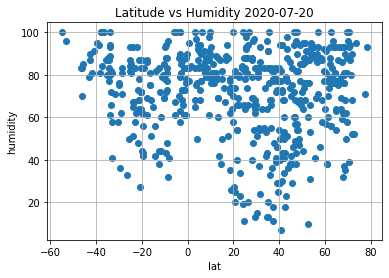

In [40]:
  
my_plot(weather_data,'lat','humidity','Latitude vs Humidity')

In [41]:
##There does not appear to be an obvious relationship between lattitude and humidity. 

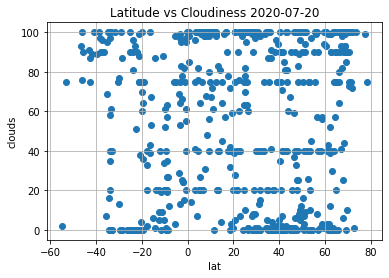

In [42]:
my_plot(weather_data,'lat','clouds','Latitude vs Cloudiness')


In [43]:
##Cloudiness does also not appear to be related to latitude, but it does appear to be measured common break points like 20%, 
##40%,75%, and 100%

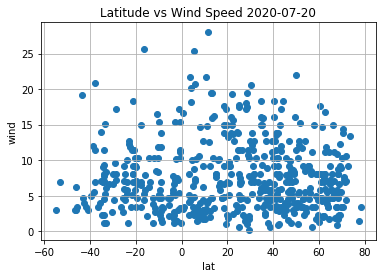

In [44]:
my_plot(weather_data,'lat','wind','Latitude vs Wind Speed')

In [45]:
#Wind speed and latitude do not appear to be strongly correlated. 

In [46]:
# Create Northern and Southern Hemisphere DataFrames
weather_data['lat'] = pd.to_numeric(weather_data['lat'], errors='coerce')
weather_data['lat'].describe()

south_data=weather_data.loc[weather_data['lat']<0]
north_data=weather_data.loc[weather_data['lat']>0]


The line equation is: y =-0.45x +88.46.
The r-squared is: 0.48191795044208113


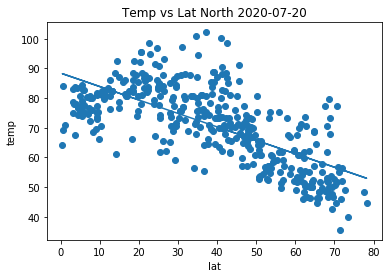

The line equation is: y =0.71x +78.15.
The r-squared is: 0.5487090223957524


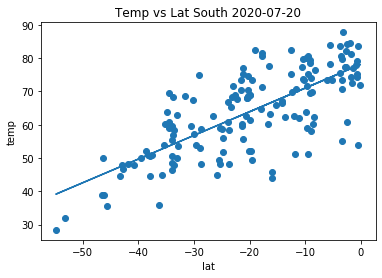

In [47]:
# Create a function to create Linear Regression plots
#input (data frame, x value, y value, title of plot)
#save output to a .png file

def my_reg(mydf, x, y, title):
    x_values=pd.to_numeric(mydf[x])
    y_values=pd.to_numeric(mydf[y])
    plt.scatter(x_values, y_values)
    plt.xlabel(x)
    plt.ylabel(y)
    new_title=title+" "+str(today)
    plt.title(new_title)
    (slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_values,y_values)
    regress_values=x_values*slope+intercept
    plt.plot(x_values, regress_values)
    line_eq="y ="+str(round(slope,2))+ "x +"+str(round(intercept,2))
    print(f"The line equation is: {line_eq}.")
    print(f"The r-squared is: {rvalue**2}")
    filename=title+"_"+str(today)+".png"
    plt.savefig(filename, format='png')
    plt.show()
my_reg(north_data,'lat','temp','Temp vs Lat North')    
my_reg(south_data,'lat','temp','Temp vs Lat South')    

In [48]:
#In the southern hemisphere, the temperature increases as latitude increases. The northern hemisphere, the temperature 
#decreases as latitude increases. The relationship between latitude and temperature is stronger in the Southern hemisphere
#than in the Northern hemisphere (r2 of .549 versus r2 of .482). In either case, there are some temperature plots far off of 
#fit line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line equation is: y =-0.03x +71.64.
The r-squared is: 0.0008285127328342288


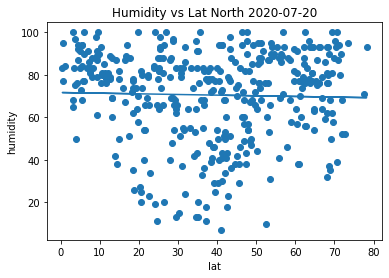

The line equation is: y =-0.21x +70.26.
The r-squared is: 0.027821612784305803


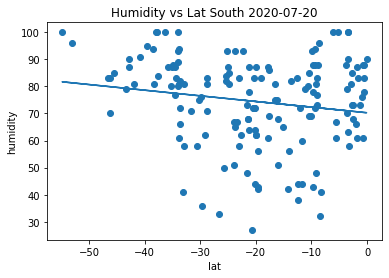

In [49]:
my_reg(north_data,'lat','humidity','Humidity vs Lat North')    
my_reg(south_data,'lat','humidity','Humidity vs Lat South')    

In [50]:
#As predicted from the scatterplot, there is no significant relationship between latitude and humidity in either hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line equation is: y =-0.08x +56.38.
The r-squared is: 0.0016396509652183743


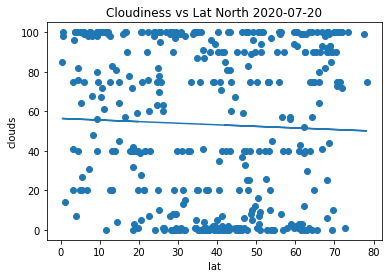

The line equation is: y =-0.47x +40.69.
The r-squared is: 0.027238561097908853


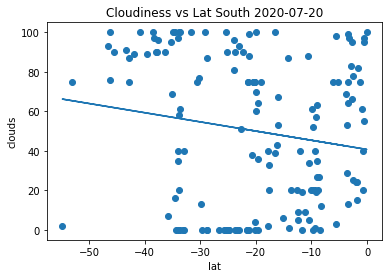

In [51]:
my_reg(north_data,'lat','clouds','Cloudiness vs Lat North')    
my_reg(south_data,'lat','clouds','Cloudiness vs Lat South')    

In [52]:
#Cloudiness does not appear to be correlated with lattitude. A slight bit more of the variation in cloudiness is associated 
#with lattitude in the Southern hemisphere, but the r2 is so low (<.05), it is not notable. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line equation is: y =-0.03x +8.94.
The r-squared is: 0.01735133793864992


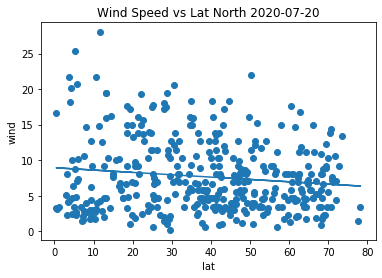

The line equation is: y =-0.01x +6.92.
The r-squared is: 0.0005361937490878561


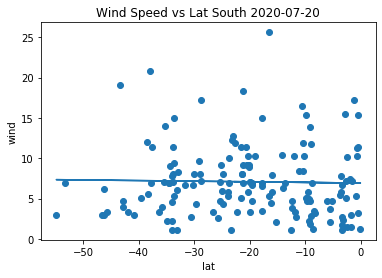

In [53]:
my_reg(north_data,'lat','wind','Wind Speed vs Lat North')    
my_reg(south_data,'lat','wind','Wind Speed vs Lat South')    

In [54]:
##There is little relationship between wind speed and latitude in either hemisphere. 